## 1. Importing Packages

In [1]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohaR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohaR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. Load The Data

In [2]:
df = pd.read_csv('./spam.csv', encoding='latin1')

## 3. Data Cleaning

In [3]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'email'})
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

label    0
email    0
dtype: int64

In [6]:
# Check for duplicates

df.duplicated().sum()

df = df.drop_duplicates(keep='first')   

In [7]:
df.shape

(5169, 2)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

## 4. EDA

#### 4.1 Percentage of ham and spam

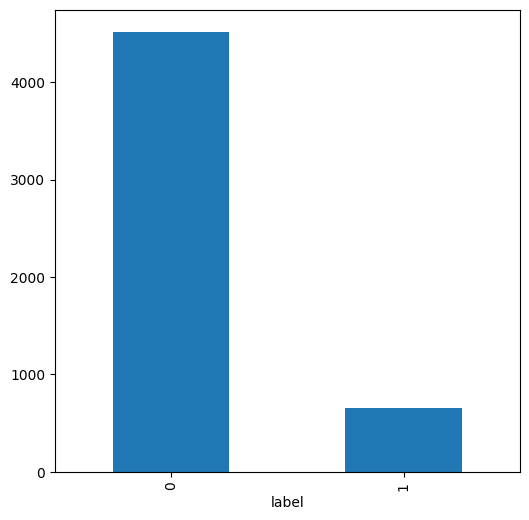

In [9]:
df['label'].value_counts().plot(kind='bar', figsize=(6, 6))
plt.show()

#### 4.2  Text Length and Structure Analysis

In [10]:
df['num_characters'] = df['email'].apply(len)
df['num_words'] = df['email'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['email'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [11]:
df[['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### 4.3  Summary Statistics for Legitimate Messages

In [12]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### 4.4 Summary Statistics for Spam Messages

In [13]:
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### 4.5 Character Length Distribution for Legitimate and Spam Messages

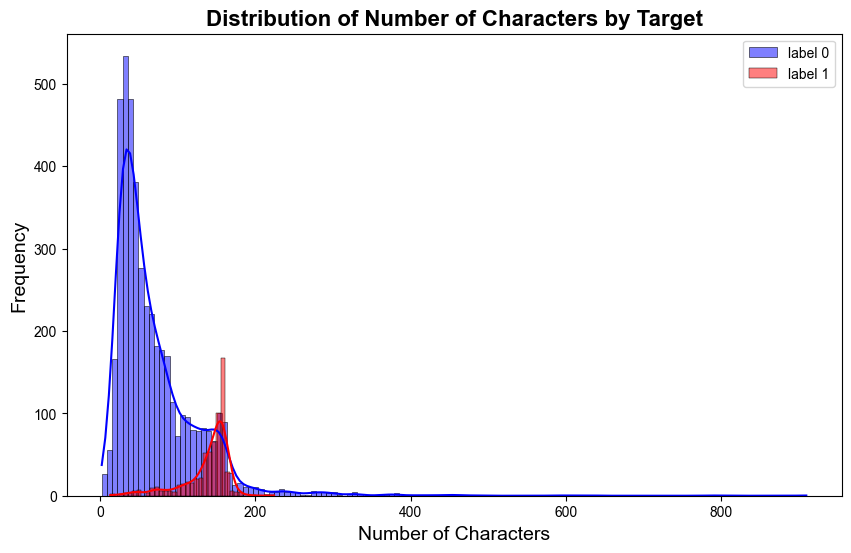

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue', label='label 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='label 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

#### 4.6 Word Count Distribution for Legitimate and Spam Messages

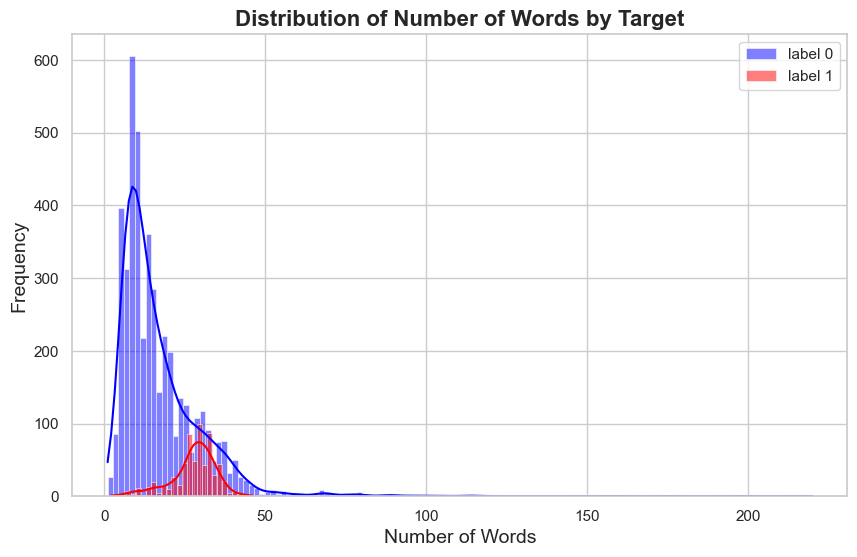

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['label'] == 0]['num_words'], color='blue', label='label 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='label 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

#### 4.7  Coorelation


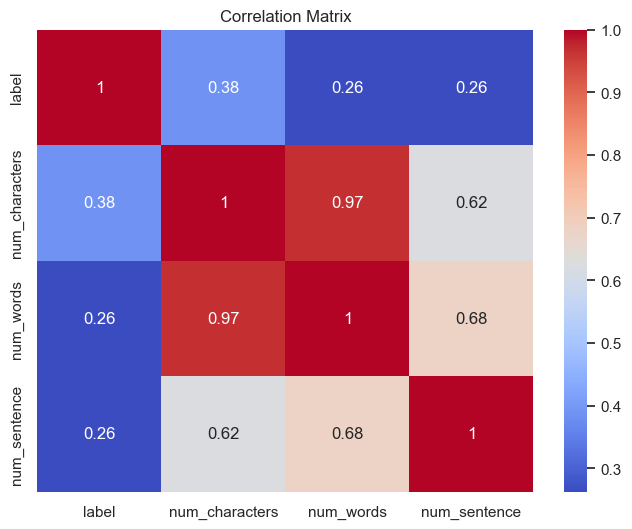

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[['label','num_characters', 'num_words', 'num_sentence']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

## 5. Data Preprocessing

In [17]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def transform_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords and non-alphanumeric tokens
    words = [word for word in words if word.isalnum() and word not in stop_words]
    
    # Stem the words
    words = [ps.stem(word) for word in words]
    
    # Join the words back together
    return ' '.join(words)

transform_text('Get 50% off! Visit our website now!!!')


'get 50 visit websit'

In [18]:
df['transformed_text'] = df['email'].apply(transform_text)


In [19]:
df.head()


,label,email,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### 5.1 Word Cloud for Spam Messages

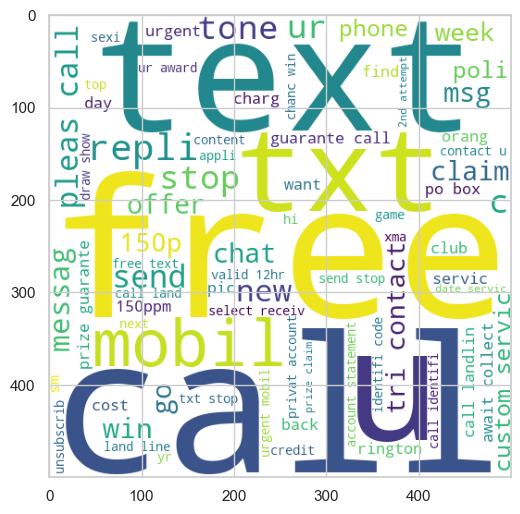

In [20]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

#### 5.2 Word Cloud for Not spam Messages

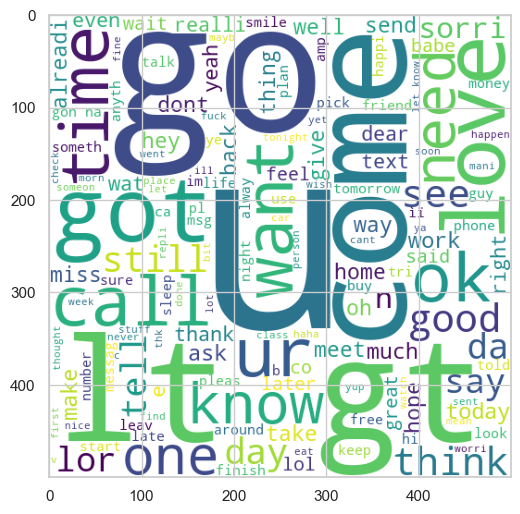

In [21]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

#### 5.3  Find top 30 words of spam and ham 


C:\Users\mohaR\AppData\Local\Temp\ipykernel_1008\843523763.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_filter_df, x='Word', y='Frequency', palette='bright')


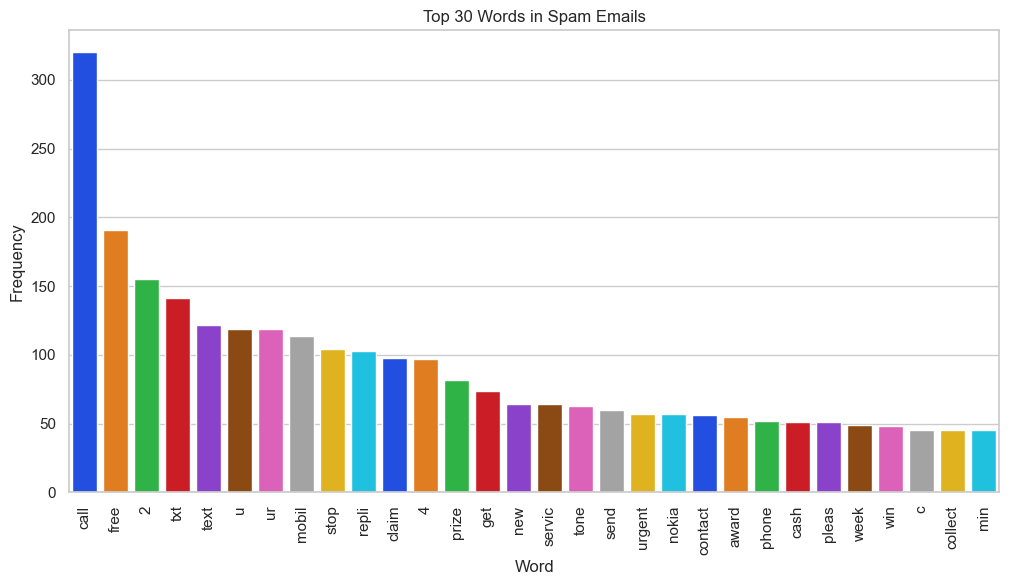

C:\Users\mohaR\AppData\Local\Temp\ipykernel_1008\843523763.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_filter_df, x='Word', y='Frequency', palette='bright')


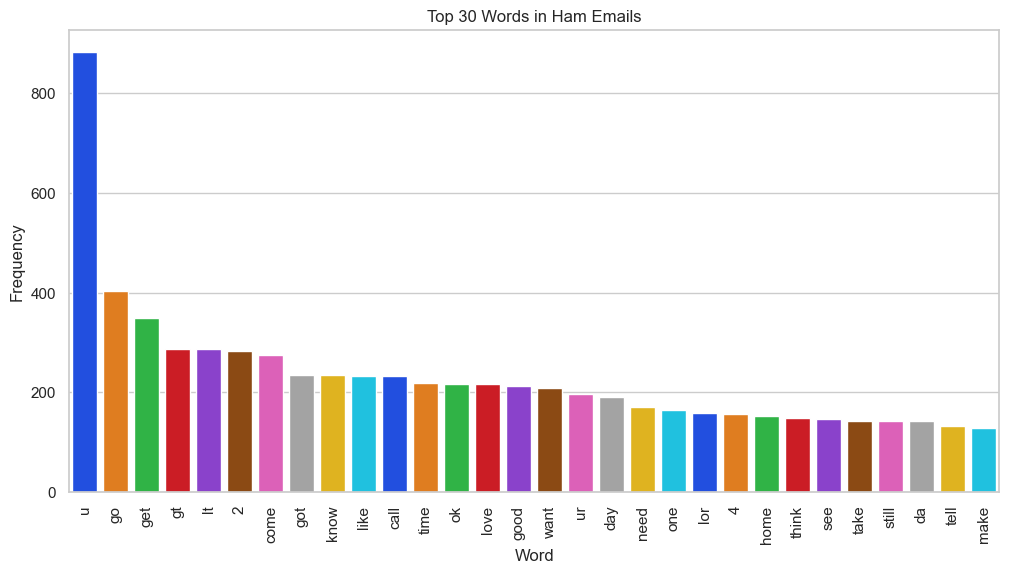

In [22]:

from collections import Counter

# Initialize list to hold words from spam emails
spam_carpos = []
for sentence in df[df['label'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

# Count word frequencies and get the 30 most common words for spam
spam_filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30), columns=['Word', 'Frequency'])

# Initialize list to hold words from ham emails
ham_carpos = []
for sentence in df[df['label'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

# Count word frequencies and get the 30 most common words for ham
ham_filter_df = pd.DataFrame(Counter(ham_carpos).most_common(30), columns=['Word', 'Frequency'])

# Plotting the most common words in spam emails
plt.figure(figsize=(12, 6))
sns.barplot(data=spam_filter_df, x='Word', y='Frequency', palette='bright')
plt.title('Top 30 Words in Spam Emails')
plt.xticks(rotation=90)
plt.show()

# Plotting the most common words in ham emails
plt.figure(figsize=(12, 6))
sns.barplot(data=ham_filter_df, x='Word', y='Frequency', palette='bright')
plt.title('Top 30 Words in Ham Emails')
plt.xticks(rotation=90)
plt.show()

## 6. Model Building

In [23]:
# Initializing CountVectorizer and TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [24]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

#### 6.1 Split data to train and test

In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2)

#### 6.2 Import models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

#### 6.3 Initialize the Models

In [27]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 100, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 100, random_state = 2)

In [190]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

#### 6.4 Model training

In [194]:
ccuracy_scores = {}
precision_scores = {}

# Perform cross-validation and evaluate each classifier
for name, clf in clfs.items():
    avg_accuracy = 0
    avg_precision = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        
        avg_accuracy += accuracy
        avg_precision += precision
    
    # Calculate average metrics across folds
    avg_accuracy /= kf.get_n_splits()
    avg_precision /= kf.get_n_splits()
    
    accuracy_scores[name] = avg_accuracy
    precision_scores[name] = avg_precision
    
    print(f'Classifier: {name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print()

Classifier: SVC
Average Accuracy: 0.9725
Average Precision: 0.9581

Classifier: KNN
Average Accuracy: 0.9110
Average Precision: 1.0000

Classifier: NB
Average Accuracy: 0.9714
Average Precision: 0.9942

Classifier: DT
Average Accuracy: 0.9323
Average Precision: 0.8013

Classifier: LR
Average Accuracy: 0.9549
Average Precision: 0.9415

Classifier: RF
Average Accuracy: 0.9756
Average Precision: 0.9925

Classifier: Adaboost
Average Accuracy: 0.9638
Average Precision: 0.9282

Classifier: ETC
Average Accuracy: 0.9762
Average Precision: 0.9775

Classifier: GBDT
Average Accuracy: 0.9511
Average Precision: 0.9446

Classifier: xgb
Average Accuracy: 0.9685
Average Precision: 0.9306



### training Random forrest with grid search

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [80,120],  
    'max_depth': [None, 10, 15],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2, 4]     
}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [31]:
# Dictionary to store evaluation metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
accuracy_scores = {'RandomForest': []}
precision_scores = {'RandomForest': []}

# Perform cross-validation and evaluate the RandomForestClassifier
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    grid_search.fit(X_train, y_train)
    
    best_rfc = grid_search.best_estimator_
    
    y_pred = best_rfc.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    accuracy_scores['RandomForest'].append(accuracy)
    precision_scores['RandomForest'].append(precision)

# Calculate average metrics across all folds
avg_accuracy = sum(accuracy_scores['RandomForest']) / len(accuracy_scores['RandomForest'])
avg_precision = sum(precision_scores['RandomForest']) / len(precision_scores['RandomForest'])

print(f'Classifier: RandomForest')
print(f'Average Accuracy: {avg_accuracy:.4f}')
print(f'Average Precision: {avg_precision:.4f}')

Classifier: RandomForest
Average Accuracy: 0.9760
Average Precision: 0.9853
